               Model       MAE       MSE  R2 Score
0  Linear Regression  2.001944  6.552837  0.554994
1  Gradient Boosting  1.723196  4.732532  0.678612
2                KNN  1.062227  2.678600  0.818095
3      Decision Tree  1.039045  2.097973  0.857526
4      Random Forest  0.942812  1.677519  0.886079


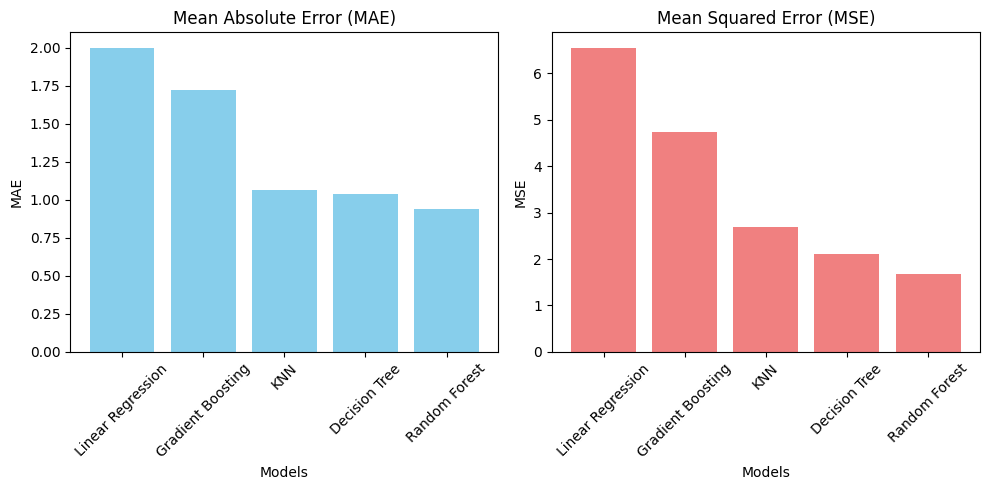

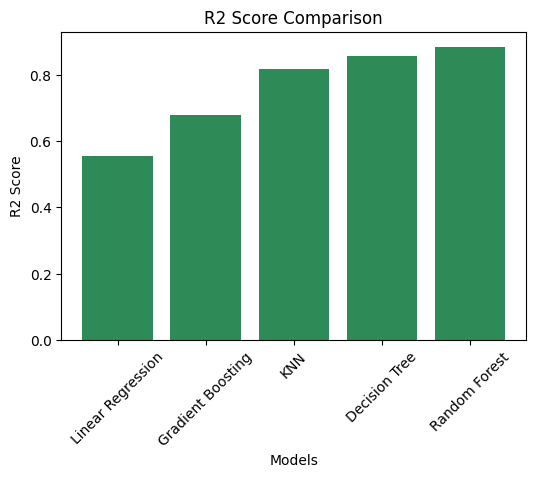

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datasets
df1 = pd.read_csv("location-information.csv")
df2 = pd.read_csv("weather-data.csv")

# Merging the datasets on a common column
df = pd.merge(df1, df2, on='last_updated_epoch', how='inner')

# Preprocessing: Handling missing values
df = df.dropna()

# Feature selection
features = [
    "wind_mph", "wind_kph", "pressure_mb", "humidity", "cloud", "uv_index",
    "visibility_km", "gust_mph", "gust_kph", "latitude", "longitude"
]

target = "temperature_celsius"

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": AdaBoostRegressor(n_estimators=200, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

# Store evaluation metrics
evaluation_metrics = []
mae_scores = {}
mse_scores = {}
r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_scores[name] = mae
    mse_scores[name] = mse
    r2_scores[name] = r2
    
    evaluation_metrics.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    })

# Create DataFrame for results
results_df = pd.DataFrame(evaluation_metrics)
print(results_df)

# Plot MAE and MSE
plt.figure(figsize=(10, 5))
x_labels = list(models.keys())

plt.subplot(1, 2, 1)
plt.bar(x_labels, mae_scores.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(x_labels, mse_scores.values(), color='lightcoral')
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Mean Squared Error (MSE)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot R2 Score
plt.figure(figsize=(6, 4))
plt.bar(x_labels, r2_scores.values(), color='seagreen')
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.show()
